In [1]:
import urllib
import pandas as pd
import numpy as np
from astropy import coordinates as coord
from astropy import units as u

In [2]:
#loading as a pandas dataframe:
sweetCat_table_url = "http://sweetcat.iastro.pt/catalog/SWEETCAT_Dataframe.csv"
dtype_SW = dtype={'gaia_dr2':'int64','gaia_dr3':'int64'}
SC = pd.read_csv(urllib.request.urlopen(sweetCat_table_url), dtype=dtype_SW)
print(SC.columns)

Index(['Name', 'hd', 'RA', 'DEC', 'Vmag', 'eVmag', 'PlxFlag', 'Teff', 'eTeff',
       'Logg', 'eLogg', 'Vt', 'eVt', '[Fe/H]', 'e[Fe/H]', 'Reference', 'Link',
       'SWFlag', 'Update', 'Comment', 'Database', 'gaia_dr2', 'gaia_dr3',
       'Plx', 'ePlx', 'Gmag', 'eGmag', 'RPmag', 'eRPmag', 'BPmag', 'eBPmag',
       'FG', 'eFG', 'G_flux_std_n', 'Logg_gaia', 'eLogg_gaia', 'Mass_t',
       'eMass_t', 'Radius_t', 'eRadius_t', 'spec_base', 'Distance', 'RA_EU',
       'DEC_EU', 'RA_NASA', 'DEC_NASA', 'Distance_b', 'eDistance_b'],
      dtype='object')


In [3]:
#loading as a astropy Table:
from astropy.table import Table
from astropy.io.ascii import convert_numpy
sweetCat_table_url = "https://sweetcat.iastro.pt/catalog/SWEETCAT_Dataframe.csv"
converters={'gaia_dr2': [convert_numpy(np.int64)],
            'gaia_dr3': [convert_numpy(np.int64)] }
T = Table.read(sweetCat_table_url, encoding='UTF-8',
           format='csv', converters=converters)
print(T.colnames)

['col0', 'Name', 'hd', 'RA', 'DEC', 'Vmag', 'eVmag', 'PlxFlag', 'Teff', 'eTeff', 'Logg', 'eLogg', 'Vt', 'eVt', '[Fe/H]', 'e[Fe/H]', 'Reference', 'Link', 'SWFlag', 'Update', 'Comment', 'Database', 'gaia_dr2', 'gaia_dr3', 'Plx', 'ePlx', 'Gmag', 'eGmag', 'RPmag', 'eRPmag', 'BPmag', 'eBPmag', 'FG', 'eFG', 'G_flux_std_n', 'Logg_gaia', 'eLogg_gaia', 'Mass_t', 'eMass_t', 'Radius_t', 'eRadius_t', 'spec_base', 'Distance', 'RA_EU', 'DEC_EU', 'RA_NASA', 'DEC_NASA', 'Distance_b', 'eDistance_b']


In [4]:
SC[["Name", "RA", "DEC", "Gmag", "Teff"]]

,Name,RA,DEC,Gmag,Teff
0,11 Com,12 20 43.02,+17 47 34.33,4.437300,4824.0
1,11 UMi,15 17 05.88,+71 49 26.04,4.556700,4314.0
2,14 And,23 31 17.41,+39 14 10.30,4.922200,4745.0
3,14 Her,16 10 24.31,+43 49 03.52,6.395200,5360.0
4,16 Cyg B,19 41 51.97,+50 31 03.08,6.073400,5785.0
...,...,...,...,...,...
3231,HD 96992,11 10 23.24,+43 55 08.32,8.284226,4725.0
3232,TOI-519,08 18 25.66,-19 39 46.50,15.677020,3350.0
3233,TOI-837,10 28 08.99,-64 30 18.93,10.359779,6047.0
3234,TYC 0434-04538-1,18 05 21.55,+02 03 44.60,9.927217,4679.0


In [5]:
SC[SC["Name"] == "51 Peg"]

,Name,hd,RA,DEC,Vmag,eVmag,PlxFlag,Teff,eTeff,Logg,...,Radius_t,eRadius_t,spec_base,Distance,RA_EU,DEC_EU,RA_NASA,DEC_NASA,Distance_b,eDistance_b
13,51 Peg,217014,22 57 27.98,+20 46 07.79,5.46,0.05,GAIAeDR3,5810.0,21.0,4.33,...,1.155875,0.037868,51Peg_HARPSS_115000_378_691_2020,15.526793,344.3625,20.768611,344.36754,20.769096,15.514698,0.019995


## Get planet propreties from exoplanet.eu

In [6]:
import urllib.request
from astropy.io import votable
import warnings
def downloadExoplanet(file_exo = "exo.csv"):
    """
    Download the table of Confirmed planets from exoplanetEU and save it to a file (exo.csv).
    Return a pandas DataFrame sorted in 'update'.
    """
    response = urllib.request.urlopen("http://exoplanet.eu/catalog/votable")
    table = response.read()
    with open('exo.xml', 'wb') as f:
        f.write(table)
    """Convert the saved xml file to csv and read with pandas"""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        vo = votable.parse('exo.xml', invalid='mask', pedantic=False)
        vo = vo.get_first_table().to_table(use_names_over_ids=True)
        df = vo.to_pandas()

    # Divide the data in Confirmed and not.
    df[df.planet_status == 'Confirmed'].to_csv(file_exo, index=False)

In [7]:
## We also provide teh exo.csv file taken from the last SWEET-Cat update
# 
download = True
if download:
    downloadExoplanet()
exo = pd.read_csv("exo.csv")

In [8]:
exo.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [10]:
#Getting coordinates matching
coordSCEU   = coord.SkyCoord(ra=SC['RA_EU'].values,
                           dec=SC['DEC_EU'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')
coordExo    = coord.SkyCoord(ra=exo['ra'].values,
                           dec=exo['dec'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')

In [11]:
SCind = np.where(SC.Name == "mu Ara")[0][0]
print(SCind)
#SCind = 3001
def get_planets_for_SC_star(SCind):
    outres = []
    if "EU" in SC.Database[SCind]:
        sep = coordSCEU[SCind].separation(coordExo).arcsecond
        ind = np.where(sep <= np.nanmin(sep))[0]
        if len(ind) > 0:
            outres = exo.loc[ind].reset_index()
    else:
        print ("No EU planets in Database")
    return outres
planets = get_planets_for_SC_star(SCind)[["name", "mass", "mass_sini", "radius", "semi_major_axis", "eccentricity"]]
planets

2340


,name,mass,mass_sini,radius,semi_major_axis,eccentricity
0,mu Ara b,NaN,1.67600,NaN,1.50000,0.1280
1,mu Ara c,NaN,0.03321,NaN,0.09094,0.1720
2,mu Ara d,NaN,0.52190,NaN,0.92100,0.0666
3,mu Ara e,NaN,1.81400,NaN,5.23500,0.0985


In [12]:
planets.columns

Index(['name', 'mass', 'mass_sini', 'radius', 'semi_major_axis',
       'eccentricity'],
      dtype='object')

## Get planet propreties from NASA Exoplanets Archive

In [13]:
def downloadNasaExoplanetNew():
    """
    Download the table from NASA exoplanet archive
    and save it to a file (nasaexo.csv).
    """
    nasa_url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps+where+default_flag=1&format=csv"
    # Download the data
    response = urllib.request.urlopen(nasa_url)
    table = response.read()

    # Write the NASA exoplanet archive
    with open('nasaexo.csv', 'wb') as f:
        f.write(table)

In [14]:
## We also provide teh exo.csv file taken from the last SWEET-Cat update
# 
download = True
if download:
    downloadNasaExoplanetNew()
nasa = pd.read_csv("nasaexo.csv", low_memory=False)

In [16]:
[print(c) for c in nasa.columns[0:10]];

pl_name
pl_letter
hostname
hd_name
hip_name
tic_id
gaia_id
default_flag
pl_refname
sy_refname


In [18]:
#Getting coordinates matching
coordSCNASA = coord.SkyCoord(ra=SC['RA_NASA'].values,
                               dec=SC['DEC_NASA'].values,
                               unit=(u.deg, u.deg),
                               frame='icrs')
coordNasa   = coord.SkyCoord(ra=nasa['ra'].values,
                               dec=nasa['dec'].values,
                               unit=(u.deg, u.deg),
                               frame='icrs')


In [19]:
SCind = np.where(SC.Name == "mu Ara")[0][0]
print(SCind)
#SCind = 3001
def get_planets_for_SC_star_NASA(SCind):
    outres = []
    if "NASA" in SC.Database[SCind]:
        sep = coordSCNASA[SCind].separation(coordNasa).arcsecond
        ind = np.where(sep <= np.nanmin(sep))[0]
        if len(ind) > 0:
            outres = nasa.loc[ind].reset_index()
    else:
        print ("No EU planets in Database")
    return outres
planets_nasa = get_planets_for_SC_star_NASA(SCind)[["pl_name", "pl_massj", "pl_msinij", "pl_radj", "pl_orbsmax", "pl_orbeccen"]]
planets_nasa

2340


,pl_name,pl_massj,pl_msinij,pl_radj,pl_orbsmax,pl_orbeccen
0,HD 160691 c,NaN,1.81400,NaN,5.23500,0.0985
1,HD 160691 e,NaN,0.52190,NaN,0.92100,0.0666
2,HD 160691 b,NaN,1.67600,NaN,1.49700,0.1280
3,HD 160691 d,NaN,0.03321,NaN,0.09094,0.1720


### Plot Planetary System

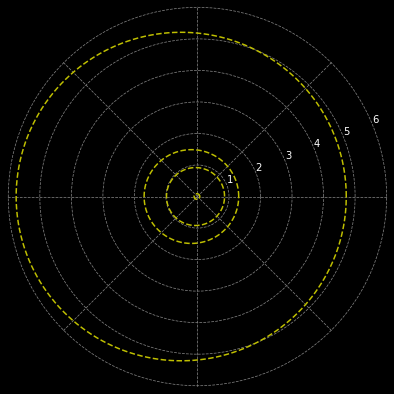

In [20]:
import matplotlib.pyplot as plt #Imports plot library
cos = np.cos
pi = np.pi


fig = plt.figure(1, figsize=(12, 7),facecolor='black')
ax = fig.add_subplot(111, projection='polar')
#ax.set_rorigin(-1)

for p in range(len(planets)):
  a = planets.semi_major_axis[p]
  e = planets.eccentricity[p]
  theta = np.linspace(0,2*pi, 360)
  r = (a*(1-e**2))/(1+e*cos(theta))
  plt.polar(theta, r, c='y', linestyle="--")
#ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.set_xticklabels([])
ax.set_facecolor('k')
ax.grid(color='gray', linestyle='--', linewidth=0.75)
ax.spines['polar'].set_visible(False)
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]
#ax.set_rlim(0)
#ax.set_rscale('symlog')
#print(np.c_[r,theta])
#ax.plot(0, 0, 'y', markersize=10000, markerfacecolor='m', markeredgecolor='k')
plt.show()

In [22]:
%%bash
jupyter nbconvert --to html PythonTutorial.ipynb
mv PythonTutorial.html ../

[NbConvertApp] Converting notebook PythonTutorial.ipynb to html
[NbConvertApp] Writing 320522 bytes to PythonTutorial.html
